<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> 📷 Cifar-10 Image Classifiction 🚀 </h1> </div> 


CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton There are 50000 training images and 10000 test images.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.



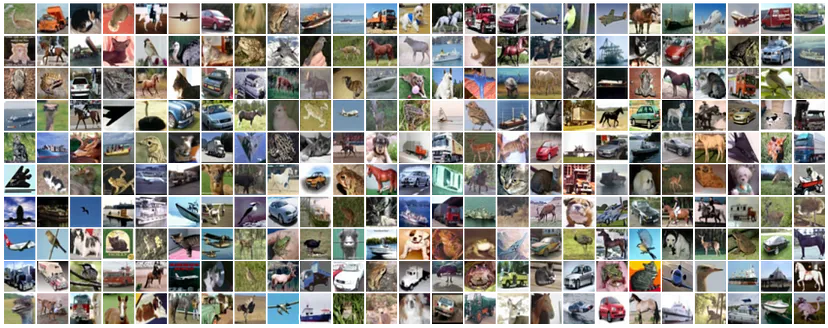

## Goal
<h5>Given an image, can we predict the correct class of this image? </h5>

> Our goal is to create an accurate deep learning model that can classify the images using the given data
    
<h5>We gonna use CNN method. Convolutional neural network(CNN) is a strong algorithm in machine learning area. There are lots of networks around us, but the special property of this is that, it can detect special features of an image or data for each class by itself. It applies certain kernels over each image, scans the matched patterns and extract the contextual features. In every CNN model, image processing functions like edge detection, blurring, sharpening occur in the convolution layers and identifying or memorizing tasks are occured in the fully connected layer portion of model.<h5>

<div class="alert alert-block alert-danger"><h2 style="text-align:center;color:black"> Loading Libraries </h2> </div> 

In [186]:
!pip install tensorflow


In [187]:
tf.__version__

'2.14.0'

In [188]:
import numpy as np
import pandas as pd

# visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

# keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models,layers
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.experimental import SGD,Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Warnings
import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Get the data and Description </h2> </div>

In [255]:
# unpack the data
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

print(len(X_train), len(y_train))
# printing the shape
print('The shape of train:',X_train.shape)
print('The shape of train_label:',y_train.shape)
print('The shape of test:',X_test.shape)
print('The shape of train_label:',y_test.shape)

50000 50000
The shape of train: (50000, 32, 32, 3)
The shape of train_label: (50000, 1)
The shape of test: (10000, 32, 32, 3)
The shape of train_label: (10000, 1)


>In this notebook we are going to build a CNN model that can classify images of various objects. We have 10 class of images:

<h6>1.Airplane</h6>
<h6>2.Automobile</h6>
<h6>3.Bird</h6>
<h6>4.Cat</h6>
<h6>5.Deer</h6>
<h6>6.Dog</h6>
<h6>7.Frog</h6>
<h6>8.Horse</h6>
<h6>9.Ship</h6>
<h6>10.Truck</h6>

This code snippet calculates the highest (maximum) and lowest (minimum) values present in the x_train dataset. It can be useful for gaining an understanding of the data's range and distribution, which can inform preprocessing or analysis steps.

<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> EDA</h2> </div>

## Let's visualize  data in a grid format

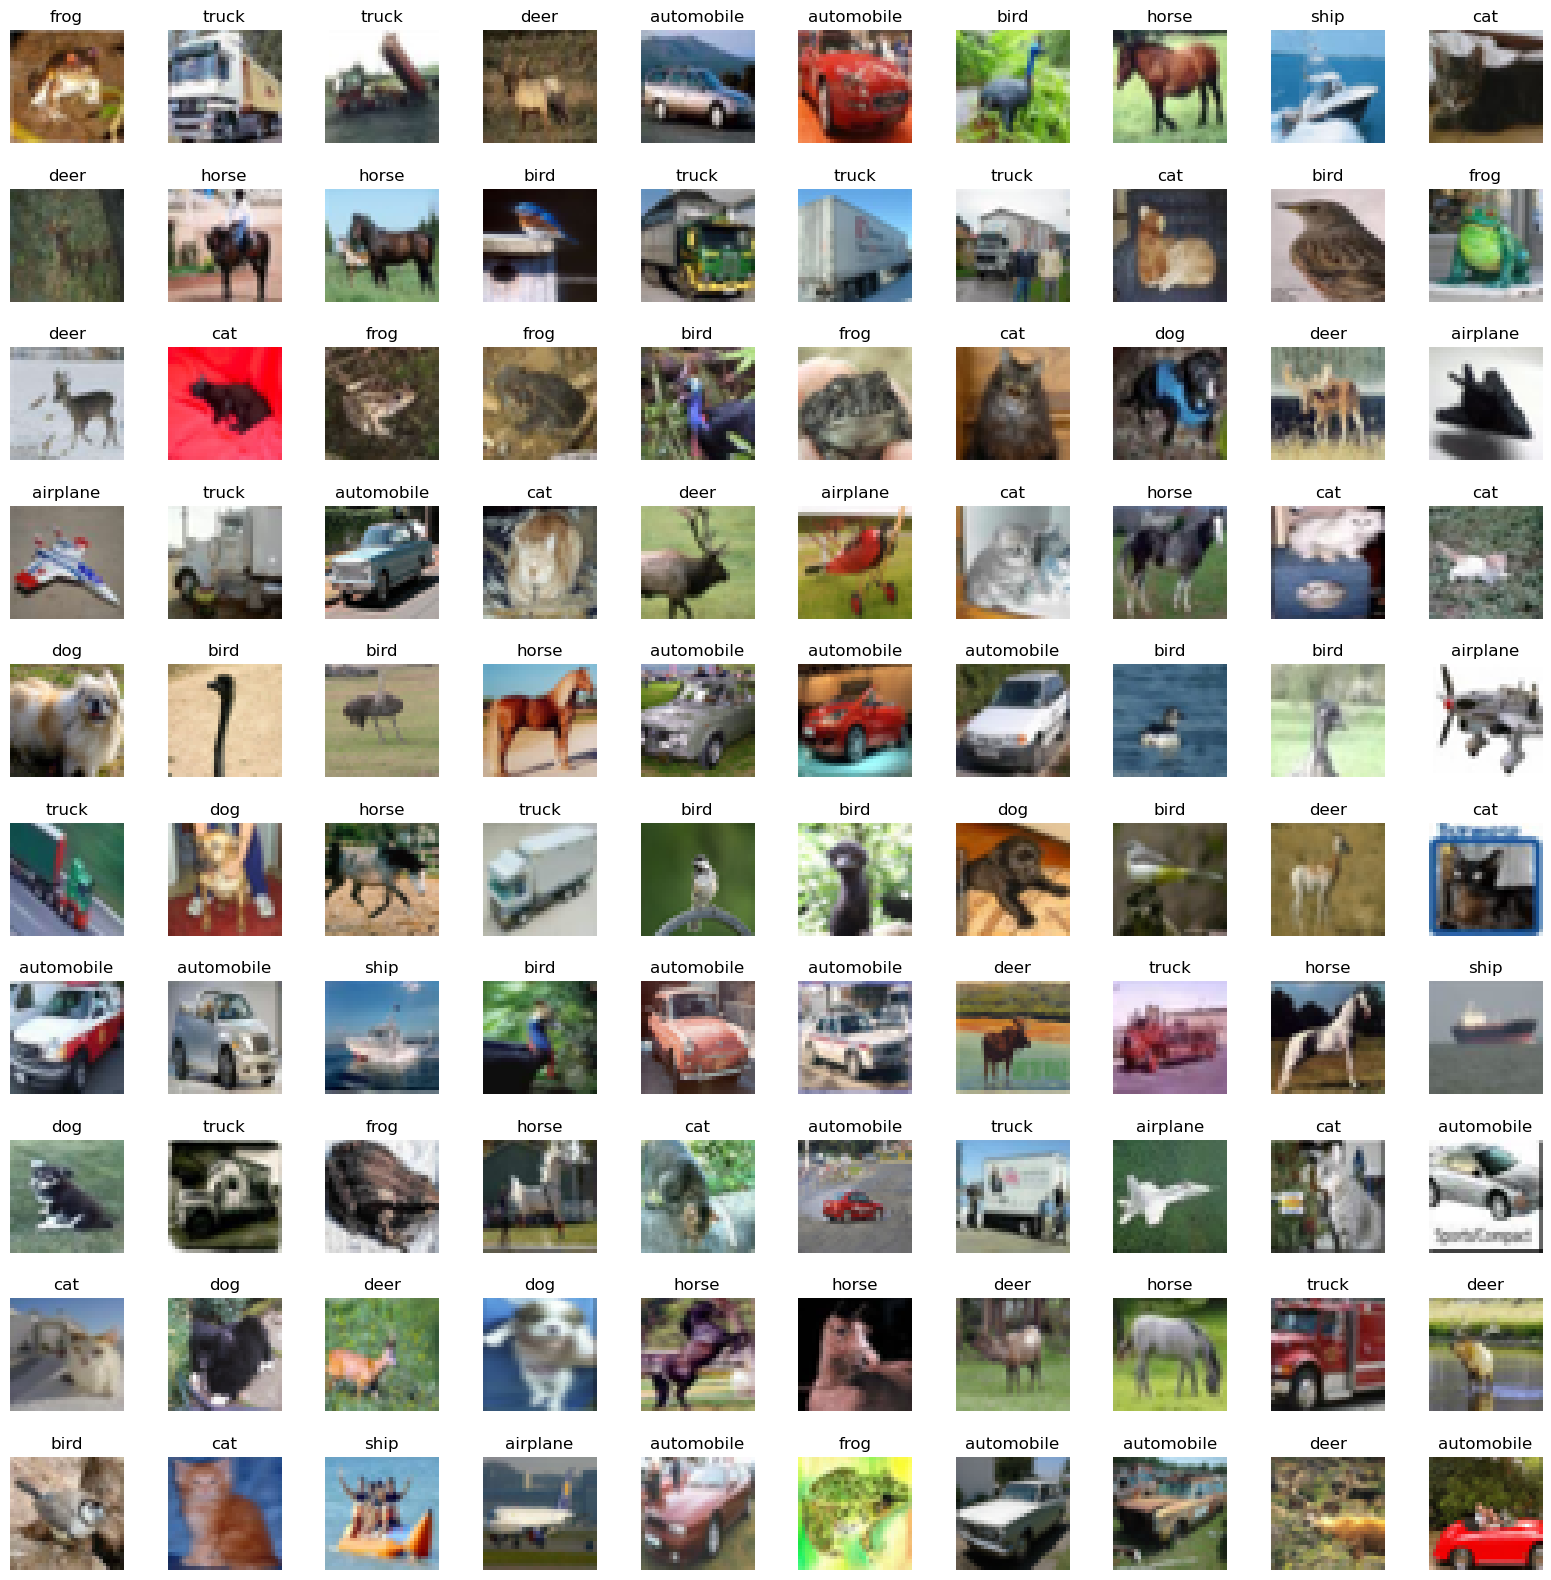

In [190]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

for i in range(100):
    
    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i])
    plt.title(labels[int(y_train[i])],fontsize=12)
    plt.axis('off')

plt.show()

In this figure, these random samples have been plotted along with its’ corresponding labeled values over the image for demonstration.

In [191]:
class_names = ['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']

print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [192]:

X_train.max(), X_train.min()

(255, 0)

In [193]:
y_train.max(), y_train.min()

(9, 0)

Normalize pixel values in x_train and x_test datasets.
This code divides all pixel values in the x_train and x_test datasets by 255.0.
This normalization process scales the pixel values to be in the range [0, 1], which can help improve the training stability and convergence of neural networks.
It ensures that the model is not sensitive to the initial magnitude of pixel values and takes into account the relative intensity of each pixel across the dataset.

In [194]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [195]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Now let's create a barplot to see the class distrubtion in trainting and testing set.

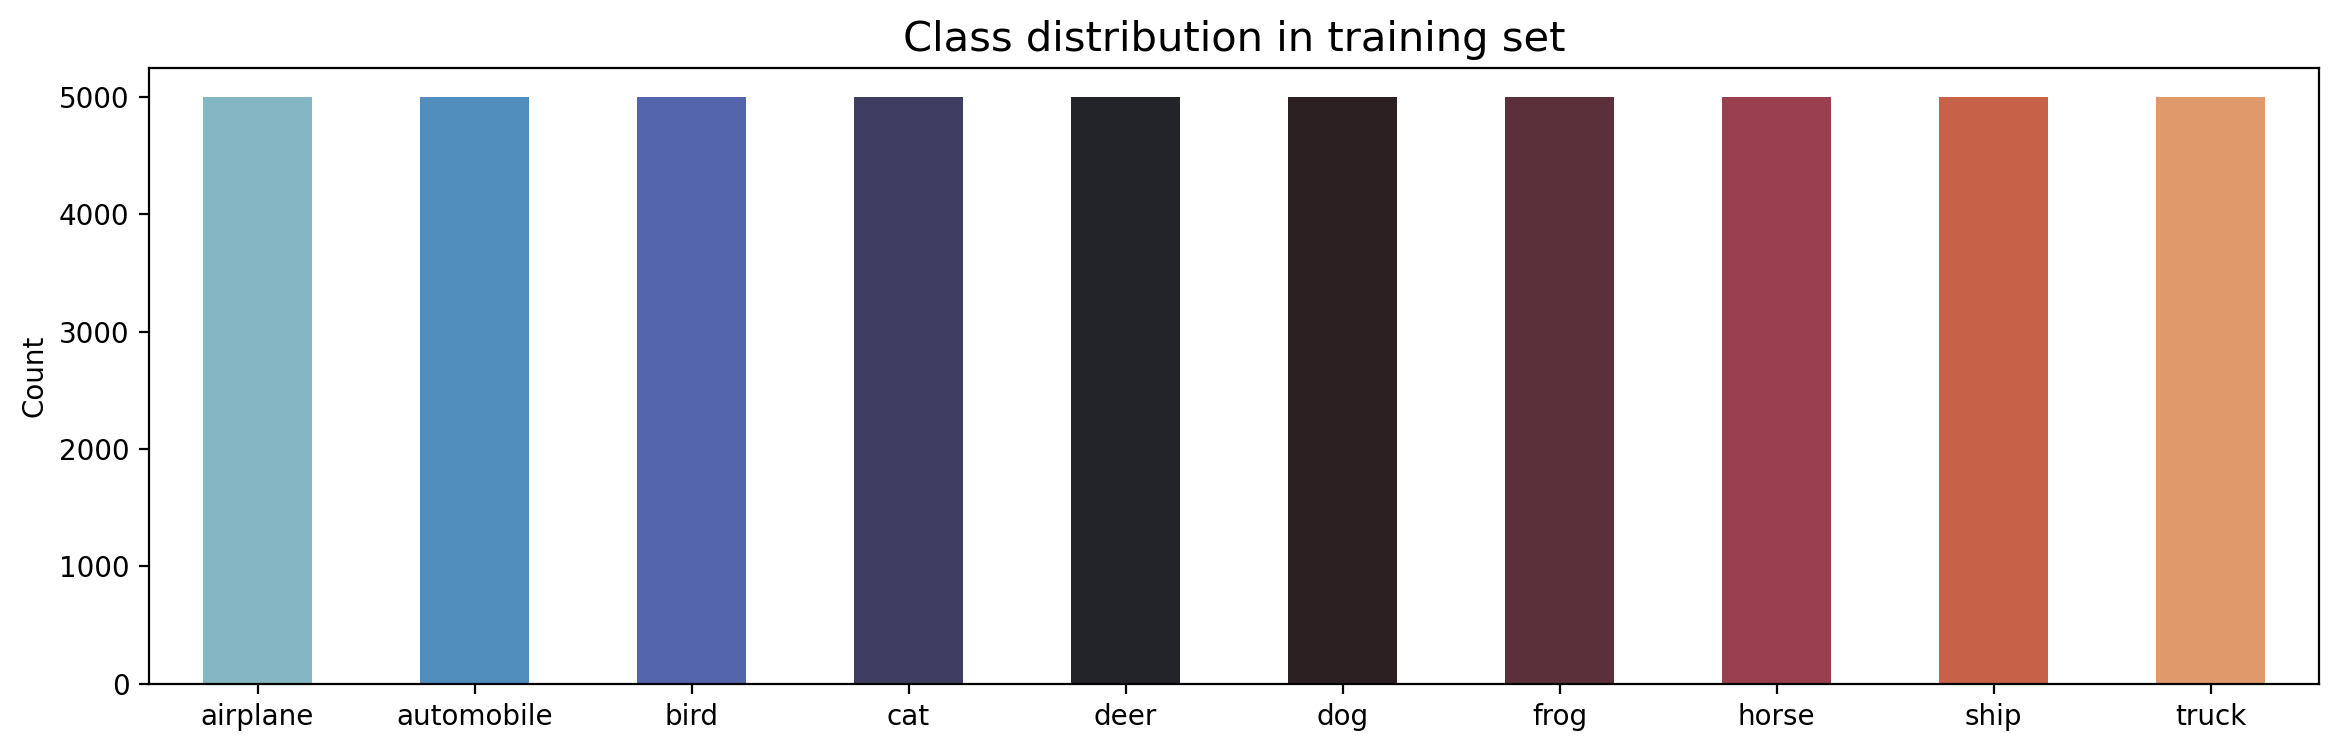

In [197]:
# count for Training dataset
label,count = np.unique(y_train,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in training set',fontsize=15)
plt.show()

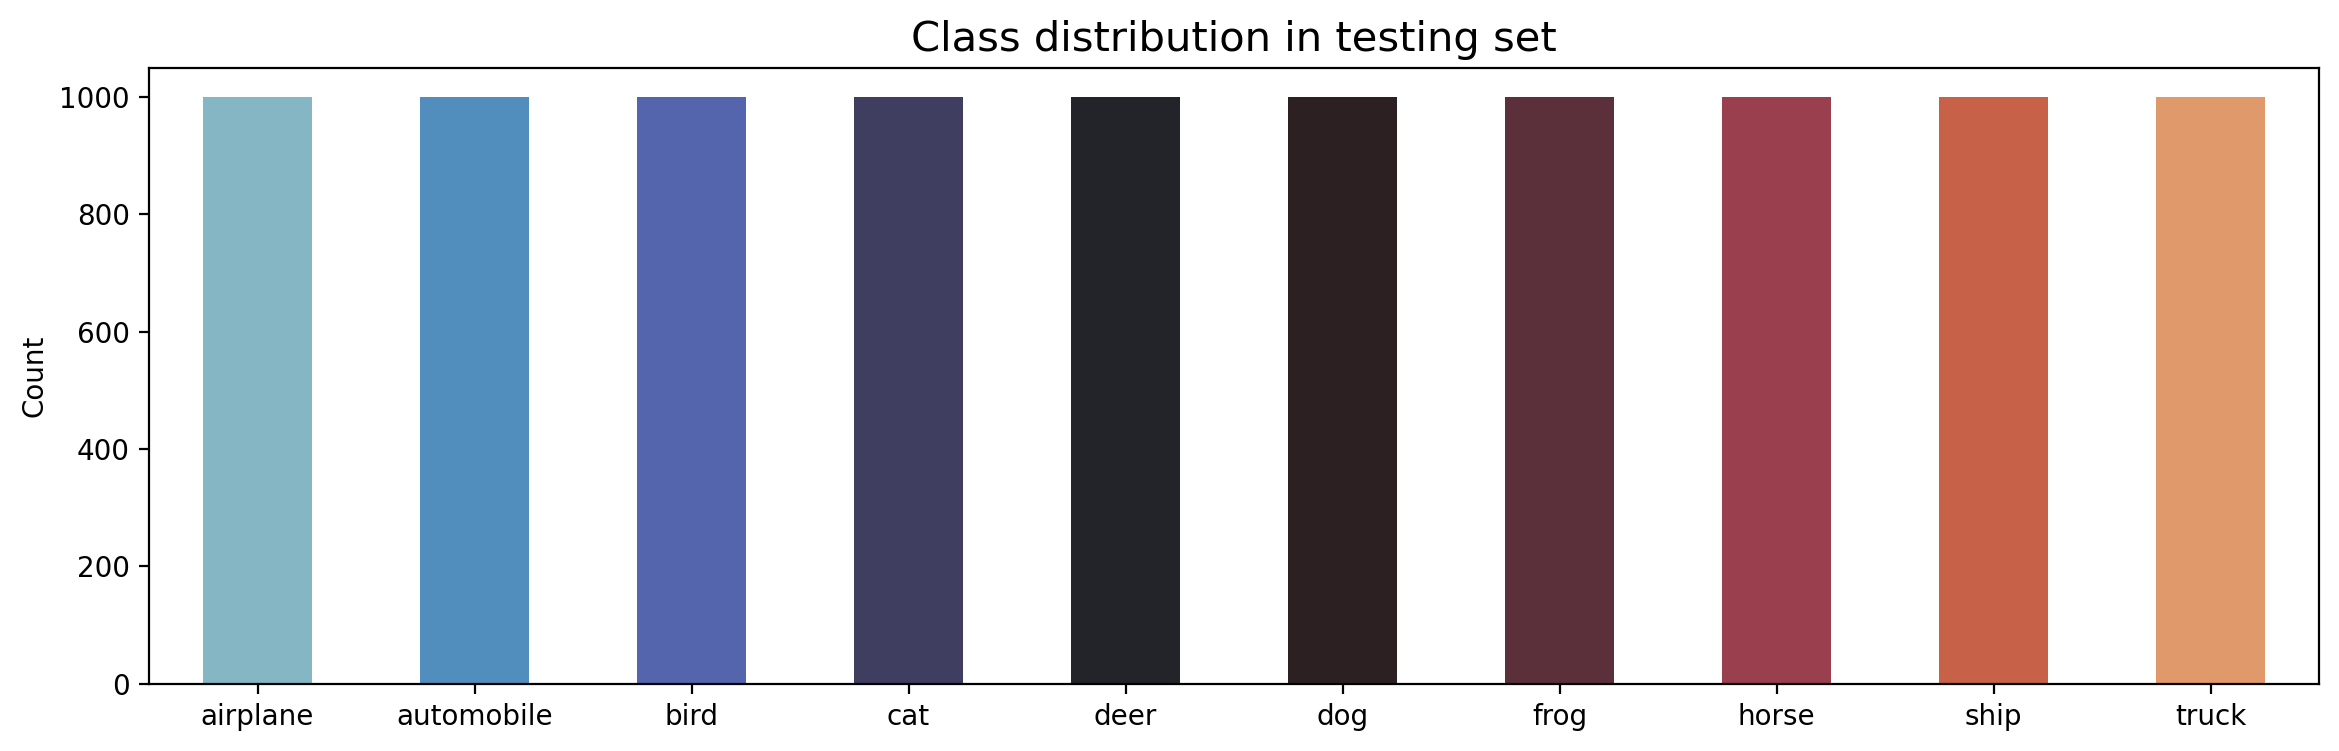

In [198]:
# count for Testing dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in testing set',fontsize=15)
plt.show()

## Check for NaN Values

In [199]:
np.isnan(X_train).any()

False

In [200]:
np.isnan(X_test).any()

False

There are no NaN values in our dataset. There is no need to preprocess the data to deal with NaN's.

<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Data Preparation(Cleaning)</h2> </div>

Using Neural Network and Deep Learning based systems, preprocessing is a must and it reduces computational loss and accuracy, if it is preprocessed in a proper way.

>Normalization: For normalizing the pixel data (Image) we can simply divide the whole pixel values with 255 since pixel values ranges from 0-255. So if we divide them with 255 we automatically normalizee the data between 0-1.

>One hot encoding: CIFAR 10 has 10 categories, in general we should label the categorical data using the one hot encoding.




In [242]:
# normalizing the input data
X_train = X_train / 255
X_test = X_test / 255

# one hot encode label
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [243]:
input_shape = (32, 32, 3)

X_train=X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)


In [244]:
y_train = tf.one_hot(tf.cast(y_test, dtype=tf.int32), depth=10)
y_test = tf.one_hot(tf.cast(y_test, dtype=tf.int32), depth=10)

In [245]:
print('train data shape: ' + str(X_train.shape))  
print('test data shape: ' + str(X_test.shape))  

train data shape: (50000, 32, 32, 3)
test data shape: (10000, 32, 32, 3)


In [237]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['acc'])

<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Deep learning model</h2> </div>

In [258]:
batch_size = 32
num_classes = 10
epochs = 10

>Run the following cell to build the model. The model contains various layers stacked on top of each other. The output of one layer feeds into the input of the next layer.

In [267]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=X_train.shape[1:], activation='relu'), 
    tf.keras.layers.Conv2D(32, 3, activation='relu'),   
    tf.keras.layers.MaxPooling2D(),  
    tf.keras.layers.Dropout(0.25),  #Dropout is a regularization layer.

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),   
    tf.keras.layers.Dense(512, activation='relu'),  
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [268]:

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_75 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_53 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_77 (Conv2D)          (None, 13, 13, 64)        36928     
                                                     

## Fit the Training Data

In [269]:
# Testing the model on a validation dataset prevents overfitting of the data. I specified a 10% validation and 90% training split.
model.fit(X_train, y_train, batch_size=32,
                    epochs=10)

Epoch 1/10
1563/1563 [==============================] - 129s 82ms/step - loss: 1.9007 - accuracy: 0.3657
Epoch 2/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3994 - accuracy: 0.4950
Epoch 3/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.2596 - accuracy: 0.5537
Epoch 4/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.1703 - accuracy: 0.5902
Epoch 5/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.1088 - accuracy: 0.6116
Epoch 6/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.0691 - accuracy: 0.6241
Epoch 7/10
1563/1563 [==============================] - 123s 79ms/step - loss: 1.0214 - accuracy: 0.6431
Epoch 8/10
1563/1563 [==============================] - 126s 81ms/step - loss: 0.9970 - accuracy: 0.6503
Epoch 9/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.9735 - accuracy: 0.6614
Epoch 10/10
1563/1563 [==============================] 

<div class="alert alert-block alert-info"><h2 style="text-align:center;color:black"> Evaluate the Model</h2> </div>

### Loss and Accuracy Curves

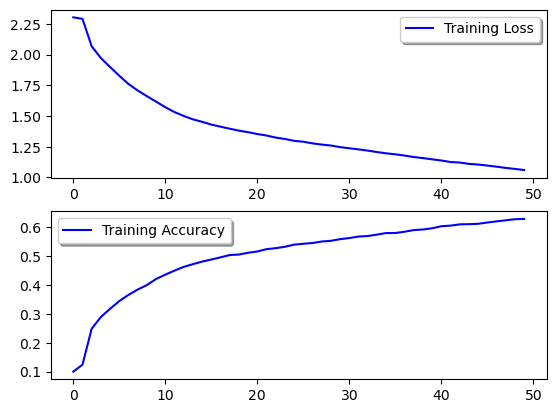

In [270]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

>The accuracy increases over time and the loss decreases over time. However, the accuracy of our validation set seems to slightly decrease towards the end even thought our training accuracy increased. Running the model for more epochs might cause our model to be susceptible to overfitting.

## Predict Results

In [271]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 0.8886 - accuracy: 0.6913


> Our model accuracy is 70%

In [279]:
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=-1)

313/313 [==============================] - 10s 31ms/step


In [280]:
y_pred[10]

2

In [281]:
y_test[10]

array([0], dtype=uint8)

## Confusion Matrix

In [282]:
from sklearn.metrics import accuracy_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[669   8  79  30  41  13  17  15  70  58]
 [ 11 794   5  13   7   7  27   9  18 109]
 [ 43   0 531  55 152  83  94  25  11   6]
 [ 15   2  62 397 116 226 124  30  10  18]
 [ 11   2  60  35 714  38  67  64   7   2]
 [  7   2  44 133  78 637  53  41   2   3]
 [  3   0  35  42  49  23 837   5   4   2]
 [  8   2  36  43  74  78  23 724   3   9]
 [ 78  28  15  26   9   8  21   3 777  35]
 [ 16  47   9  29  11   6  19  14  16 833]]


In [277]:
# Predict the values from the validation dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 10s 32ms/step


Run the following cell to plot the confusion matrix.

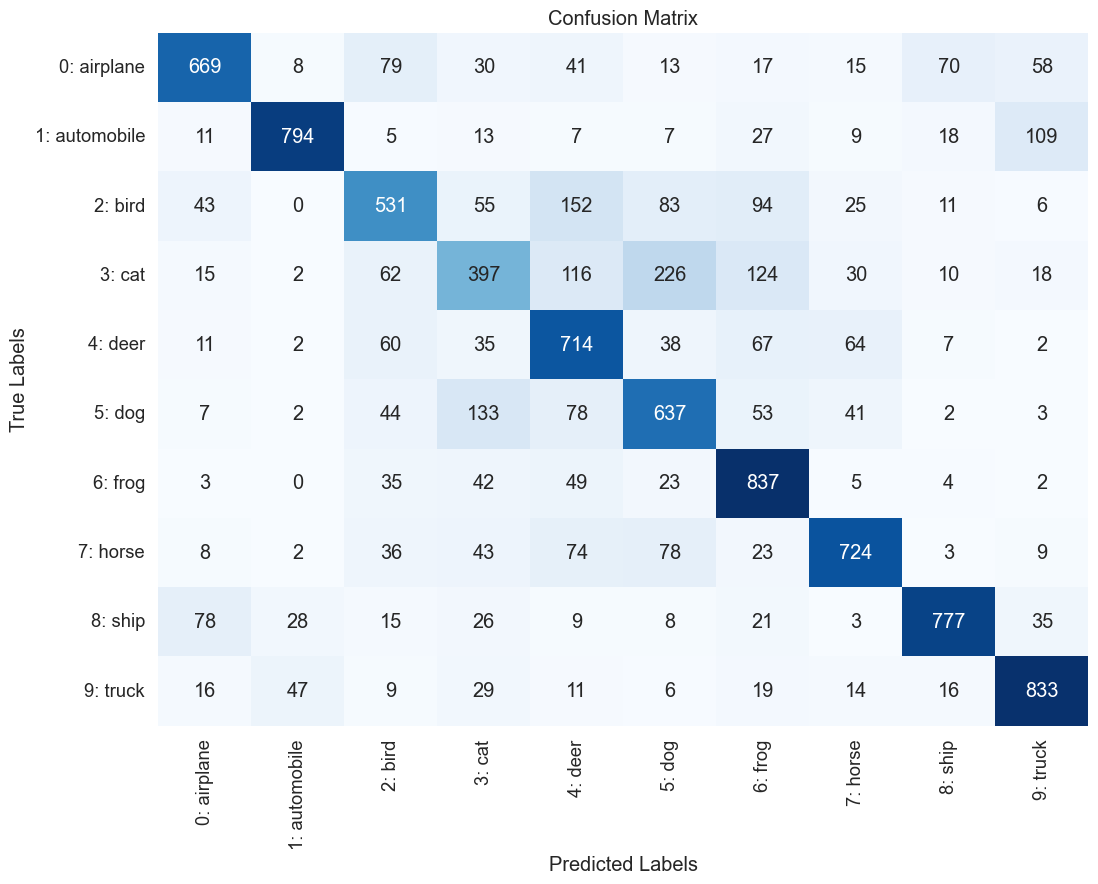

In [286]:
plt.figure(figsize=(12, 9))

sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck'],
            yticklabels=['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### As we can see the most complicated pairs of objects to identify were:

- dog and cat
- horse and dog
- truck and automobile
- cat and deer
- airplane and bird
- bird and dog